In [1]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data =  pd.read_csv("Data1.csv")
print("Du lieu ban dau")
print(data.head())
print(data.dtypes)

Du lieu ban dau
     c_d  ce_cs  ce_sg    f_q  f_sg    c_q  c_sg      w   w/c   p_q  p_ts  \
0  488.1   37.9   3.14  654.9  2.75  976.1  2.51  209.9  0.42   0.0    60   
1  488.1   37.9   3.14  622.0  2.75  976.1  2.51  209.9  0.42   8.8    60   
2  488.1   37.9   3.14  589.4  2.75  976.1  2.51  209.9  0.42  17.6    60   
3  488.1   37.9   3.14  556.6  2.75  976.1  2.51  209.9  0.42  26.4    60   
4  379.6   37.9   3.14  745.9  2.75  976.1  2.51  210.2  0.54   0.0    60   

   p_sg  slump  c_sg1   c_cs  
0  1.11      7  2.452  38.71  
1  1.11      6  2.424  42.14  
2  1.11      5  2.407  39.71  
3  1.11      4  2.384  36.73  
4  1.11      8  2.413  31.58  
c_d      float64
ce_cs    float64
ce_sg    float64
f_q      float64
f_sg     float64
c_q      float64
c_sg     float64
w        float64
w/c      float64
p_q      float64
p_ts       int64
p_sg     float64
slump      int64
c_sg1     object
c_cs     float64
dtype: object


In [3]:
# 1. Loại bỏ các ký tự không mong muốn (strip khoảng trắng, newline)
data['c_sg1'] = data['c_sg1'].astype(str).str.strip()

# 2. Thay dấu , bằng .
data['c_sg1'] = data['c_sg1'].str.replace(',', '.')

# 3. Chuyển thành số
data['c_sg1'] = pd.to_numeric(data['c_sg1'], errors='coerce')


print(data.dtypes)
print(data.count())


c_d      float64
ce_cs    float64
ce_sg    float64
f_q      float64
f_sg     float64
c_q      float64
c_sg     float64
w        float64
w/c      float64
p_q      float64
p_ts       int64
p_sg     float64
slump      int64
c_sg1    float64
c_cs     float64
dtype: object
c_d      257
ce_cs    257
ce_sg    257
f_q      257
f_sg     257
c_q      257
c_sg     257
w        257
w/c      257
p_q      257
p_ts     257
p_sg     257
slump    257
c_sg1    257
c_cs     257
dtype: int64


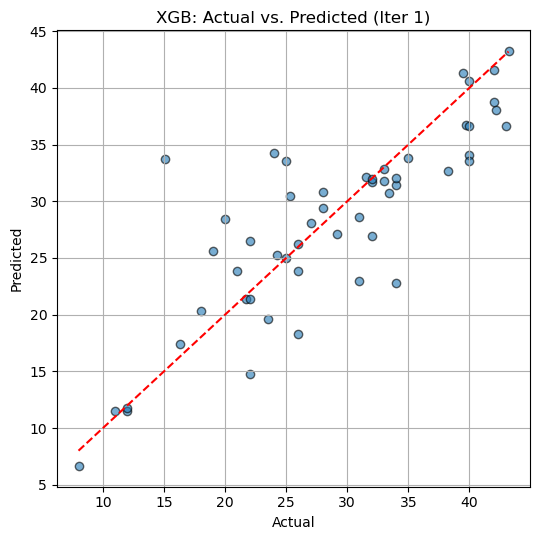

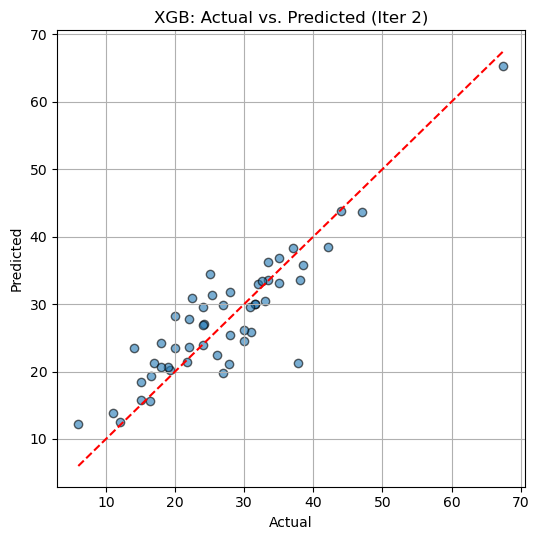

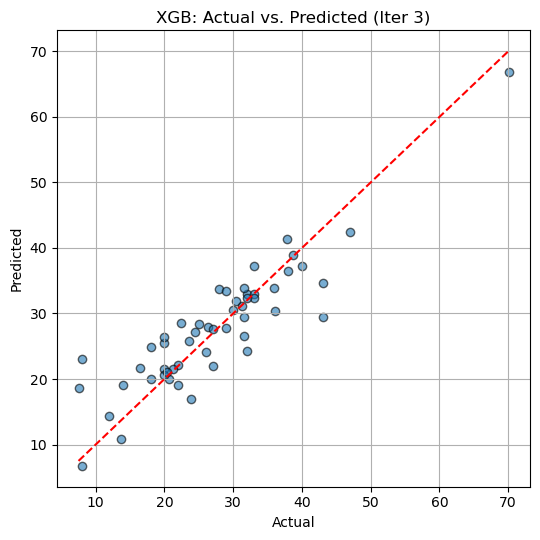

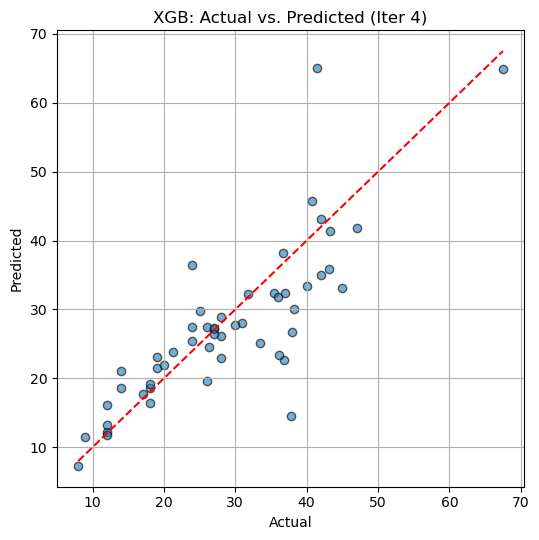

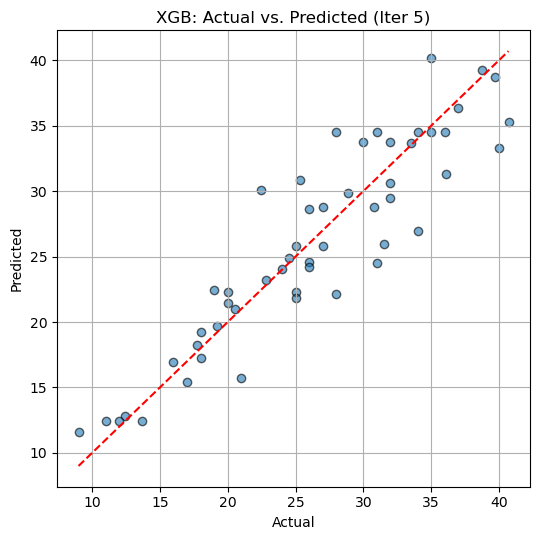

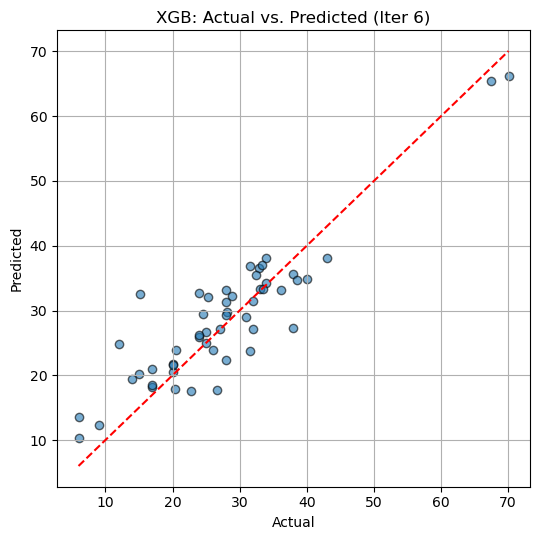

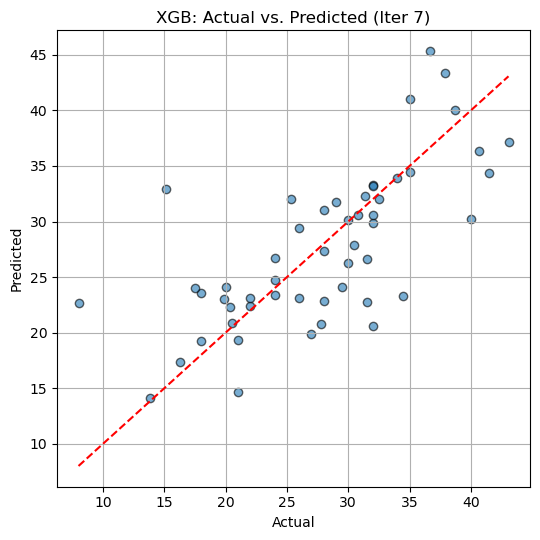

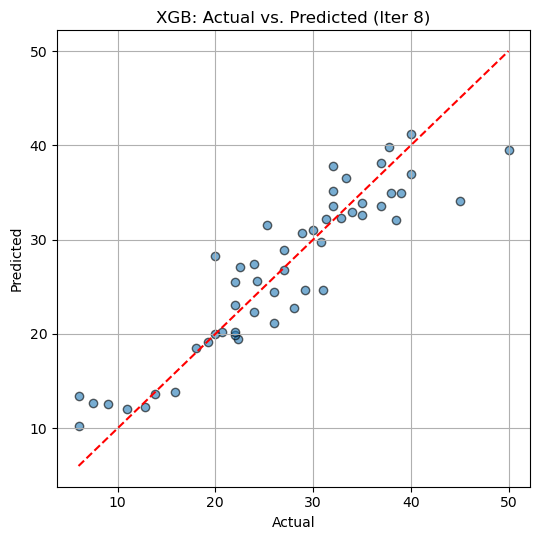

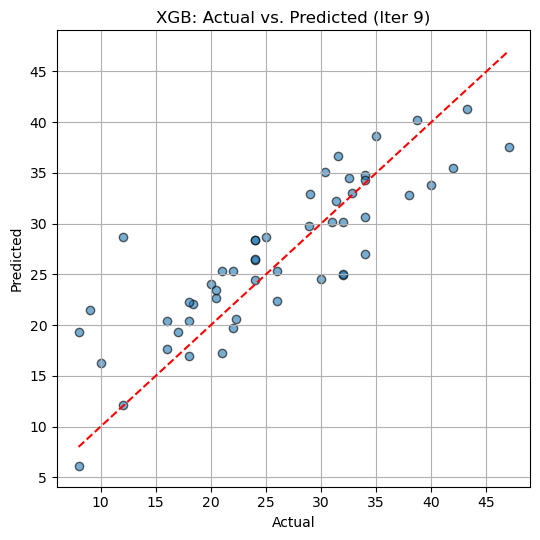

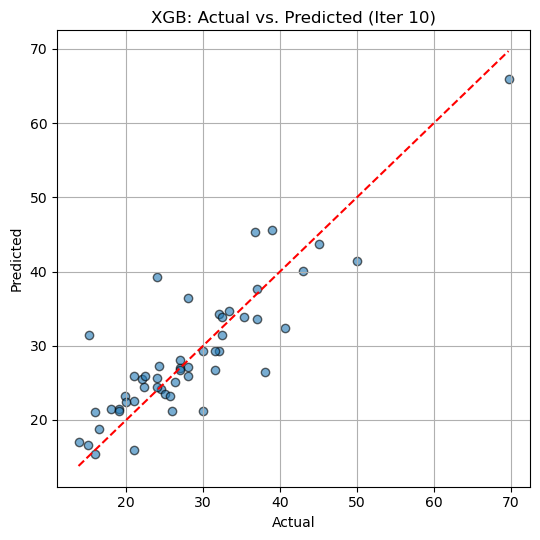


🔚 Average Metrics over 10 runs (XGB):
MAE  : 3.6396 ± 0.5790
RMSE : 4.9666 ± 0.9258
R²   : 0.7334 ± 0.1112


In [4]:
from xgboost import XGBRegressor

X = data[["c_d", "ce_cs", "ce_sg", "f_q", "f_sg", "c_q", "c_sg", "w", "w/c", "p_q", "p_ts", "p_sg", "slump"]].values
y = data[["c_cs"]].values.ravel()  # Chuyển về vector 1 chiều cho XGB

mae_list, rmse_list, r2_list = [], [], []

for seed in range(10):
    # Chia tập dữ liệu train/test (giữ nguyên để so sánh)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2
    )

    # Chuẩn hóa dữ liệu
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 🚀 Khởi tạo mô hình XGB KHÔNG đặt random_state → tạo kết quả khác nhau mỗi lần
    model = XGBRegressor(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        subsample=1.0,
        random_state=None,  # 💡 Không cố định seed
        verbosity=0  # Tắt cảnh báo console không cần thiết
    )

    # Huấn luyện
    model.fit(X_train_scaled, y_train)

    # Dự đoán
    y_pred = model.predict(X_test_scaled)

    # Tính các metric
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    mae_list.append(mae)
    rmse_list.append(rmse)
    r2_list.append(r2)

    # Biểu đồ
    plt.figure(figsize=(5.5, 5.5))
    plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"XGB: Actual vs. Predicted (Iter {seed+1})")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("\n🔚 Average Metrics over 10 runs (XGB):")
print(f"MAE  : {np.mean(mae_list):.4f} ± {np.std(mae_list):.4f}")
print(f"RMSE : {np.mean(rmse_list):.4f} ± {np.std(rmse_list):.4f}")
print(f"R²   : {np.mean(r2_list):.4f} ± {np.std(r2_list):.4f}")
